Estatística - Probabilidade e Amostragem

Desafio Final - Ana Ribeiro

In [1]:
#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom

In [2]:
#Leitura da base de dados
df = pd.read_csv("populacao_brasileira.csv")
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [3]:
df.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [4]:
#Excluindo a coluna Unnamed:0
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [6]:
#Verificando tipos de dados encontrados
df.dtypes

estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object

In [7]:
df.shape

(1000, 6)

In [8]:
#Executando describe para obter medidas básicas estatísticas
df.describe()

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


Considerando a base de dados de populacao_brasileira.csv responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [9]:
#Verificando quantidade total de pessoas na amostra
df.shape[0]

1000

In [10]:
#Verificando quantidade de pessoas que falam inglês no nível avançado
pessoas_ingles_avancado = df['nível de proficiência em inglês'].value_counts()
pessoas_ingles_avancado

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

In [11]:
#Calculando probabilidade de pessoas fluentes em ingles
probabilidade_fluentes_ingles = (344 / 1000)
print(f'A probabilidade de haver pessoas fluentes em inglês na amostra é de {probabilidade_fluentes_ingles*100:.2f}%')

A probabilidade de haver pessoas fluentes em inglês na amostra é de 34.40%


In [12]:
#Calculando a probabilidade complementar
probabilidade_complementar_fluentes_ingles = (1 - probabilidade_fluentes_ingles)
print(f'A probabilidade complementar é de {probabilidade_complementar_fluentes_ingles*100:.2f}%')

A probabilidade complementar é de 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [13]:
#Quantidade de pessoas dos estados de AL e PA
total_PA_AL = df.query('estado == "PA" or estado == "AL"')['estado'].value_counts().sum()
total_PA_AL

79

In [14]:
#Quantidade de pessoas dos estados de AL e PA, com renda maior que 5000
total_PA_AL_5k = df.query('(estado == "AL" or estado == "PA") and renda > 5000')['estado'].value_counts().sum()
total_PA_AL_5k

4

In [15]:
#Calculando a probabilidade
probabilidade_PA_AL_5k = (total_PA_AL_5k / total_PA_AL) * 100
print(f'A probabilidade de uma pessoa ser do PA ou do AL e ter renda superior a 5 mil reais é de {probabilidade_PA_AL_5k:.2f}%')

A probabilidade de uma pessoa ser do PA ou do AL e ter renda superior a 5 mil reais é de 5.06%


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [16]:
#Contagem de pessoas da amostra
df.shape[0]

1000

In [17]:
#Contagem de pessoas do Amazonas
df.query('estado == "AM"').value_counts().sum()

38

In [18]:
#Verificando a quantidade de pessoas que possuem ensino superior no Amazonas
pessoas_superior_completo_AM = df.query('estado == "AM" and (escolaridade == "Superior" or escolaridade == "Pós-graduação")').value_counts().sum()
pessoas_superior_completo_AM

21

In [19]:
#Probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas
probabilidade_superior_AM = (21 / 38)
print(f'A probabilidade de uma pessoa ser do Amazonas e ter ensino superior completo é de {probabilidade_superior_AM*100:.2f}%')

A probabilidade de uma pessoa ser do Amazonas e ter ensino superior completo é de 55.26%


In [20]:
#Probabilidade da quinta pessoa amazonense ter ensino superior completo - considerando distribuição binomial
q = 1 - probabilidade_superior_AM #probabilidade de fracasso
k = 5 #5ª pessoa
n = pessoas_superior_completo_AM
p = probabilidade_superior_AM

In [21]:
probabilidade_quinta_pessoa = binom.pmf(k, n, p) * 100
print(f'A probabilidade da quinta pessoa ser amazonense e ter ensino superior completo é de {probabilidade_quinta_pessoa:.2f} %')

A probabilidade da quinta pessoa ser amazonense e ter ensino superior completo é de 0.27 %


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [22]:
#Análise de distribuição de renda
#1 - Verificando o valor mínimo de renda
df.renda.min()

103.74

In [23]:
#1 - Verificando o valor máximo de renda
df.renda.max()

5632.38

In [24]:
faixas = [0, 1500, 3000, 4500, 6000]
faixas

[0, 1500, 3000, 4500, 6000]

In [25]:
#Faixas de renda (em reais):
#Faixa D: De 0 até 1500
#Faixa C: De 1500 a 3000
#Faixa B: De 3000 a 4500
#Faixa A: Acima de 6000
labels = ['D', 'C', 'B', 'A']
labels

['D', 'C', 'B', 'A']

In [26]:
#Criando tabela de frequências
frequencia = pd.value_counts(
    pd.cut(
       x = df.renda,
       bins = faixas,
       labels = labels,
       include_lowest = True))
frequencia

B    442
C    414
A     89
D     55
Name: renda, dtype: int64

In [27]:
#Criando tabela de percentual
percentual = pd.value_counts(
    pd.cut(
       x = df.renda,
       bins = faixas,
       labels = labels,
       include_lowest = True
       ),
       normalize = True
    )
percentual

B    0.442
C    0.414
A    0.089
D    0.055
Name: renda, dtype: float64

In [28]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
) #transforma as duas medidas calculadas em um dataframe
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
B,442,0.442
C,414,0.414
A,89,0.089
D,55,0.055


In [29]:
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,89,0.089
B,442,0.442
C,414,0.414
D,55,0.055


<ipython-input-30-7a73efa283b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.renda)


<Axes: title={'center': 'Distribuição de Frequências -Renda'}, xlabel='R$', ylabel='Density'>

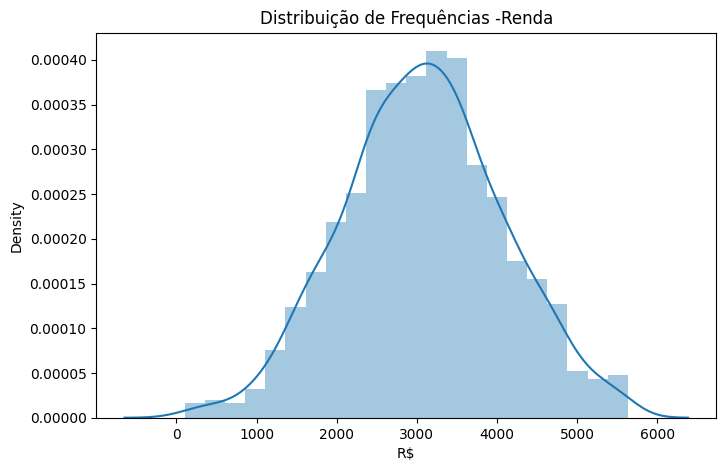

In [30]:
ax = sns.distplot(df.renda)
ax.figure.set_size_inches(8, 5)
ax.set_title('Distribuição de Frequências -Renda', fontsize = 12)
ax.set_xlabel('R$', fontsize = 10)
ax

<Axes: >

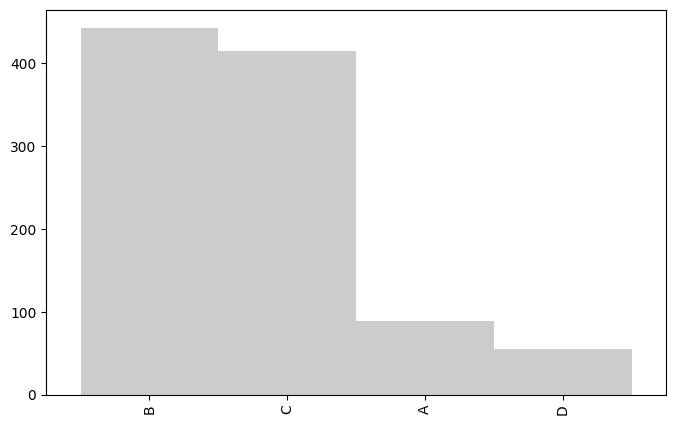

In [31]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'black', alpha = 0.2, figsize = (8, 5))

In [32]:
moda = df.renda.mode()[0]
moda

1918.94

In [33]:
mediana = df.renda.median()
mediana

3076.415

In [34]:
media = df.renda.mean()
media

3082.5371800000003

In [35]:
moda < mediana < media
#simetria à direita

True

Considerando a distribuição por faixa de 1500 a 1500 reais, a concentração de renda fica maior na faixa B. Áreas de maior probabilidade localizadas no pico da curva do histograma, onde se concentram a mediana e a média. Áreas de menor probabilidade localizadas nas extremidades.

5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [36]:
#Cálculo da média
media = df.renda.mean()
media

3082.5371800000003

In [37]:
#Cálculo da variância
variancia = df.renda.var()
variancia

993156.2281676152

In [38]:
sexo = df.sexo.nunique()
sexo

2

In [39]:
n_escolaridade = df.escolaridade.nunique()
n_escolaridade

4

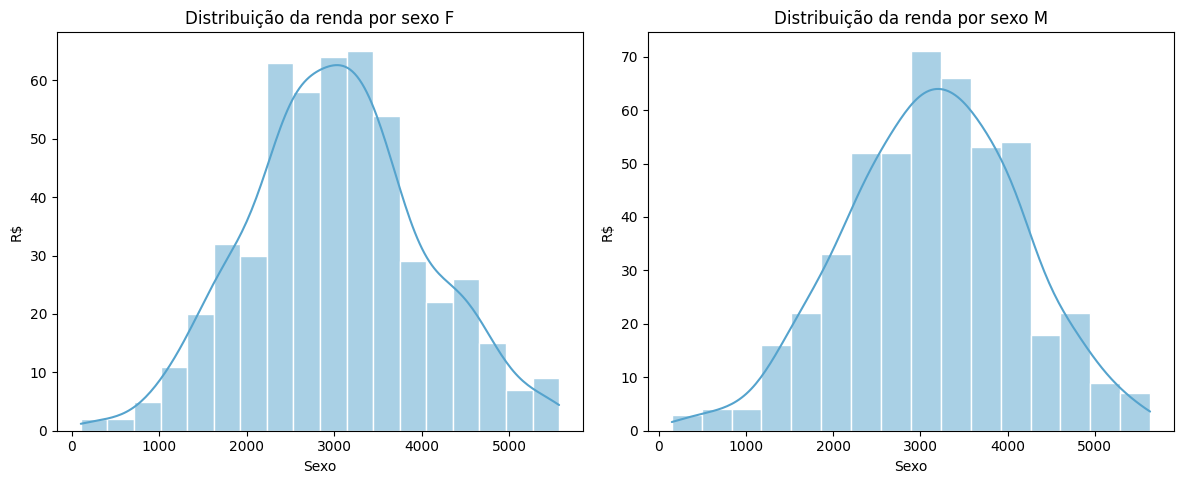

In [40]:
#Distribuição normal de Renda por Sexo
sns.set_palette("icefire")

sexo = df.sexo.nunique()
fig, ax = plt.subplots(nrows=1, ncols=sexo, figsize=(12, 5))
i = 0
for sexo in df.sexo.unique():
  ### histograma
  sns.set(style="darkgrid")
  sns.histplot(df[df.sexo == sexo]["renda"], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição da renda por sexo {}'.format(sexo))
  ax[i].set_xlabel('Sexo')
  ax[i].set_ylabel('R$')
  ### adiciona contador
  i = i + 1

plt.tight_layout()
plt.show()

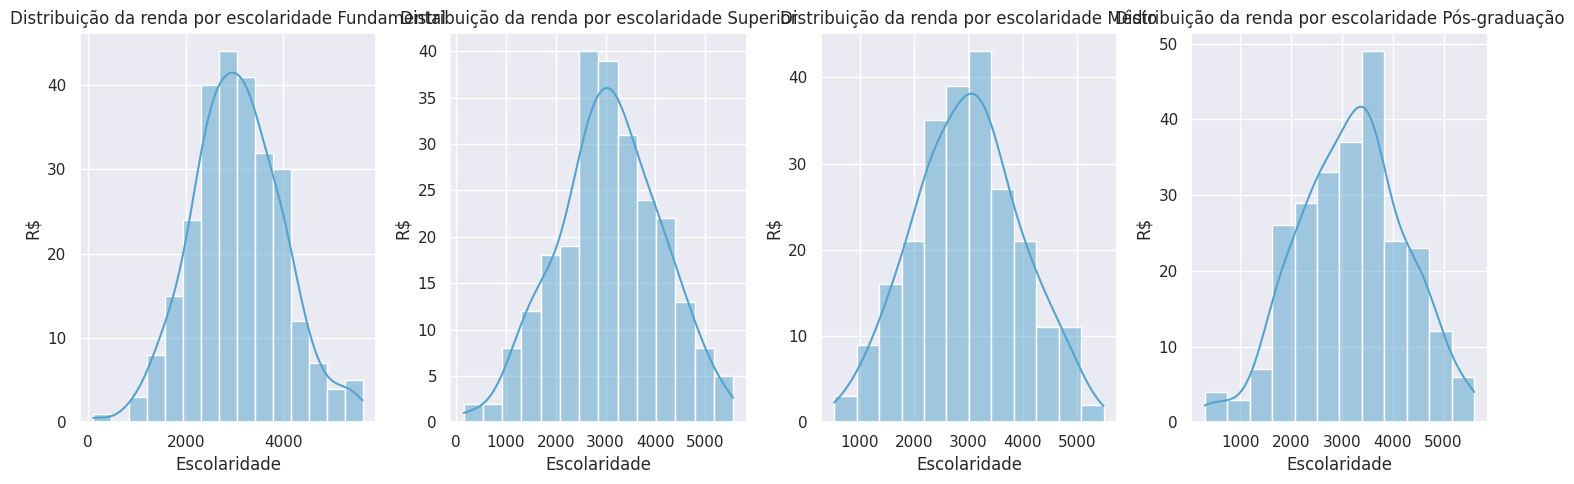

In [41]:
#Distribuição normal de renda por escolaridade
sns.set_palette("icefire")

n_escolaridade = df.escolaridade.nunique()
fig, ax = plt.subplots(nrows=1, ncols=n_escolaridade, figsize=(15, 5))
i = 0
for escolaridade in df.escolaridade.unique():
  ### histograma
  sns.set(style="darkgrid")
  sns.histplot(df[df.escolaridade == escolaridade]["renda"], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição da renda por escolaridade {}'.format(escolaridade))
  ax[i].set_xlabel('Escolaridade')
  ax[i].set_ylabel('R$')
  ### adiciona contador
  i = i + 1

plt.tight_layout()
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [42]:
#Quantidade total de pessoas na amostra
df.shape[0]

1000

In [43]:
#Contagem de pessoas com escolaridade de pós graduação
filtro_pos_graduacao = df.query('escolaridade == "Pós-graduação"').value_counts().sum()
filtro_pos_graduacao

253

In [44]:
#Probabilidade de pessoas com pós graduação
probabilidade_pos_graduacao = 253/1000
print(f'Probabilidade de pessoas que possuem pós graduação é de {probabilidade_pos_graduacao*100:.2f}%')

Probabilidade de pessoas que possuem pós graduação é de 25.30%


In [45]:
#Novo tamanho da amostra
n = 1000000
k = 243000
p = 0.253

In [46]:
probabilidade_pos_graduacao_1m = binom.pmf(k, n, p)
print(f'A probabilidade de encontrarmos 243 mil pessoas com pós graduação, com uma amostra de 1 milhão de habitantes é de {probabilidade_pos_graduacao_1m}')

A probabilidade de encontrarmos 243 mil pessoas com pós graduação, com uma amostra de 1 milhão de habitantes é de 1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [47]:
contagem_escolaridade = df.escolaridade.value_counts()
contagem_escolaridade

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: escolaridade, dtype: int64

In [48]:
soma_acumulada = contagem_escolaridade.cumsum()
soma_acumulada

Fundamental       266
Pós-graduação     519
Superior          762
Médio            1000
Name: escolaridade, dtype: int64

<Axes: >

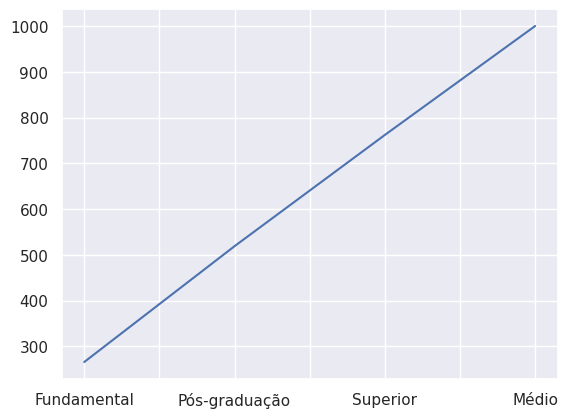

In [49]:
soma_acumulada.plot()

<ipython-input-50-0977b525d546>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(soma_acumulada.values,


Text(0.5, 1.0, 'Porcentagem acumulada de pessoas por escolaridade')

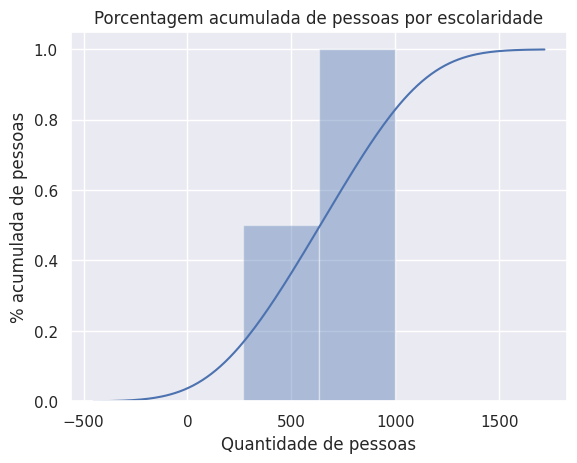

In [50]:
ax = sns.distplot(soma_acumulada.values,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.set(xlabel="Quantidade de pessoas", ylabel="% acumulada de pessoas")
ax.set_title("Porcentagem acumulada de pessoas por escolaridade")

8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [51]:
#Contagem de pessoas com nível de inglês intermediário
df['nível de proficiência em inglês'].value_counts()

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

In [52]:
n = 1000
n

1000

In [53]:
df.shape[0]

1000

In [54]:
#Proporção de pessoas com nível de inglês intermediário
proporcao_nivel_intermediario = 329 / 1000
proporcao_nivel_intermediario

0.329

In [55]:
#média da amostra
media_amostral_nivel_ingles = df['nível de proficiência em inglês'].value_counts().mean()
media_amostral_nivel_ingles

333.3333333333333

In [56]:
#desvio padrão
desvio_padrao_nivel_ingles = df['nível de proficiência em inglês'].value_counts().std()
desvio_padrao_nivel_ingles

9.29157324317757

In [57]:
z = norm.ppf(0.975)
z

1.959963984540054

In [58]:
raiz_de_n = np.sqrt(n)
raiz_de_n

31.622776601683793

In [59]:
sigma = desvio_padrao_nivel_ingles / raiz_de_n
sigma

0.2938253449471869

In [60]:
#margem de erro amostral
e = z * sigma
e

0.5758870938415442

9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [61]:
#Média da renda da população
media_renda_populacao_1000 = df.renda.mean() + 1000
media_renda_populacao_1000

4082.5371800000003

In [62]:
df_renda = df.renda
df_renda = pd.DataFrame(df_renda)

In [63]:
df_renda.query('renda >= 4082').value_counts().sum()

161

In [64]:
#Probabilidade de ter renda mil reais superior à media
probabilidade_1000_media = 161 / 1000
probabilidade_1000_media

0.161

In [65]:
#Cálculo das 60 pessoas
k = 60
n = 161
p = 0.161
probabilidade_quinta_pessoa = binom.pmf(k, n, p)
print(f'A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é {probabilidade_quinta_pessoa}')

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é 4.9578438514895214e-11


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [66]:
df_filtro_12 = df[['estado', 'sexo', 'renda', 'escolaridade']]
df_filtro_12

,estado,sexo,renda,escolaridade
0,MA,F,4006.29,Fundamental
1,BA,M,2423.11,Superior
2,AM,M,3835.69,Fundamental
3,CE,M,1870.29,Superior
4,SE,M,3529.80,Fundamental
...,...,...,...,...
995,AC,F,2852.40,Médio
996,PE,M,2533.96,Fundamental
997,GO,F,1405.30,Pós-graduação
998,RS,F,3513.60,Fundamental


In [67]:
df_filtro_12.query('(estado == "MG" or estado == "ES" or estado == "SP" or estado == "RJ") and (sexo == "M") and (escolaridade == "Fundamental") and (renda > 2000)').value_counts().sum()

19

In [68]:
#Cálculo da probabilidade
probabilidade_filtro_12 = (19 / 1000)
print(f'A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de: {probabilidade_filtro_12*100:.2f}%')

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de: 1.90%
